In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [37]:
df = pd.read_excel("flight_price.xlsx")
df.head()
# df.info()
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

ALL The data in the base are of the object type and need to convert into the int 

In [25]:
df

df['date']= (df["Date_of_Journey"].str.split("/").str[0])
df['month']= (df["Date_of_Journey"].str.split("/").str[1])
df['year']= (df["Date_of_Journey"].str.split("/").str[2])

df['date'] = df['date'].astype(int)
df['month'] = df['month'].astype(int)
df['year']=df['year'].astype(int)
df.drop('Date_of_Journey',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  date             10683 non-null  int32 
 11  month            10683 non-null  int32 
 12  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [26]:
print(df.columns)


Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'date', 'month',
       'year'],
      dtype='object')


In [27]:
df['hour'] = df['Arrival_Time'].str.split(" ").str[0].str.split(':').str[0]
df['min'] = df['Arrival_Time'].str.split(" ").str[0].str.split(':').str[1]

df['hour'] = df['hour'].astype(int)
df['min'] = df['min'].astype(int)

# Uncomment the line below if you want to drop the 'Arrival_Time' column
df.drop('Arrival_Time', axis=1, inplace=True)


In [28]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,hour,min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [29]:
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [30]:
df.head()
df['Total_Stops'].unique()
df['Total_Stops'].mode()

df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [31]:
df.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,hour,min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


<AxesSubplot:xlabel='hour', ylabel='Count'>

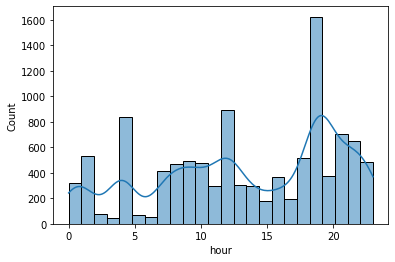

In [32]:
sns.histplot(df['hour'] ,kde=True)

In [33]:
# df.info()
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [34]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': ['x', 'y', 'z']})
print(df.info ) # Accessing the attribute

print("------------------------------------------------------------------------------- ")
df.info()

<bound method DataFrame.info of    A  B
0  1  x
1  2  y
2  3  z>
------------------------------------------------------------------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       3 non-null      int64 
 1   B       3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
